## Lab 3 – Predicting a Categorical Target and Evaluating Performance

In this lab, we are going to use a model to predict the gender (male = 0 or male = 1) of people from the Howell dataset. We will train multiple models, evaluate performance using key metrics, and create visualizations to interpret the results.

Start with your work on Lab 2. We trim that notebook down and do our training and analysis.

We will:
1. Prepare the data
2. Train 3 models: Decision Tree, Support Vector Machine (SVM), and a Neural Net (NN)
3. Get model performance on train and test sets
4. Create appropriate graphs

NOTE: We will just work with the adults since there is a nice break in the data that is not there for the children.

You should see train/test counts of approximately:
Train    size:        276    Test    size:        70

In [1]:
# imports

from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neural_network import MLPClassifier

### Section 1. Load and Inspect the Data
1.1 Load the dataset

In [2]:
# Load Howell.csv from the same folder as this file

howell_full = pd.read_csv("Howell.csv", sep=";")

### Handling Missing Data
In our case we have no missing data, so the code here is just for reference.

### Section 2. Data Exploration and Preparation

2.1 Create new features

    Compute BMI from height and weight
    Create BMI category


In [3]:
# From Lab 2

# Compute bmi based on height and weight metric units
def bmi(height, weight):
    return 10000*weight/(height**2)

# New Feature
howell_full['bmi'] = bmi(howell_full['height'], howell_full['weight'])
import numpy as np

def bmi_category(bmi):
    # bmi can only be a single value
    if bmi < 18.5: return 'Underweight'
    if bmi < 25.0: return 'Normal'
    if bmi < 30.0: return 'Overweight'
    return 'Obese'

vector_bmi_category = np.vectorize(bmi_category)
howell_full['bmi class'] = vector_bmi_category(howell_full['bmi'])

howell_full['bmi class'].value_counts()

# The following is an array of True/False
over18 = howell_full["age"] > 18

# Only keep the true instances to work with adults
howell_adults = howell_full[over18]

#The not operator is ~ in numpy
howell_children = howell_full[~over18]   

### Plot with Masking

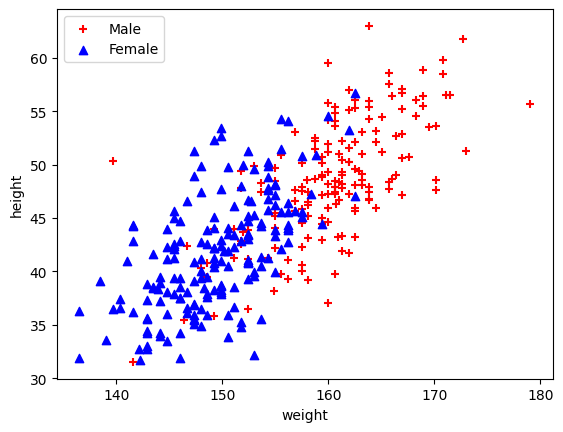

In [4]:
import matplotlib.pyplot as plt

male_height = np.ma.masked_where(howell_adults['male']==0, howell_adults['height'])
female_height = np.ma.masked_where(howell_adults['male']==1, howell_adults['height'])

weight = howell_adults['weight']
plt.scatter(male_height, weight, c='red', marker='+')
plt.scatter(female_height, weight, c='blue', marker='^')

plt.xlabel('weight')
plt.ylabel('height')
plt.legend(['Male', 'Female'])
plt.show()

### Section 3. Feature Selection and Justification
3.1 Choose features and target

First:

    input features: Height,
    target: Gender

Second:

    input features:  Weight,
    target: Gender

Third:

    input features: Height, Weight
    target: Gender

 

Justify your selections

    Height and weight are likely to show patterns based on gender.
    Age could contribute to secondary patterns. By restricting our data to adults, we help mitigate some of this. 


### 3.2 Define X (features) and y (target)

Comment out or uncomment the appropriate feature set before splitting the data. This code is set to run Case 1 - the inputs are just height.

In [5]:
# Define the input features before splitting
# Case 1: Height only
X = howell_adults[['height']]
y = howell_adults['male']

# Case 2: Weight only
# X = howell_adults[['weight']]
# y = howell_adults['male']

# Case 3: Height + Weight
# X = howell_adults[['height', 'weight']]
# y = howell_adults['male']

### Reflection 3:

     Why did you choose these features?
     How might they impact predictions or accuracy?


### Section 4. Train a Classification Model (Decision Tree)
 
4.1 Split the Data

Split the data into training and test sets using train_test_split (or StratifiedShuffleSplit if class imbalance is an issue).

Use StratifiedShuffleSplit to ensure even distribution of the target variable.

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]

print('Train size: ', len(X_train), 'Test size: ', len(X_test))

Train size:  276 Test size:  70


### 4.2 Train Model (Decision Tree)

    Create and train a decision tree model with no random initializer argument.


In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### 4.3 Evaluate Model Performance

Evaluate model performance on training data

In [8]:
# Predict and evaluate training data (X train)
y_pred = tree_model.predict(X_train)  
print("Results for Decision Tree on training data:")  
print(classification_report(y_train, y_pred))  

Results for Decision Tree on training data:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       145
           1       0.95      0.83      0.89       131

    accuracy                           0.90       276
   macro avg       0.91      0.90      0.90       276
weighted avg       0.90      0.90      0.90       276



Evaluate model performance on test data:

In [9]:
# Predict and evaluate test data
y_test_pred = tree_model.predict(X_test)
print("Results for Decision Tree on test data:")
print(classification_report(y_test, y_test_pred))

Results for Decision Tree on test data:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84        37
           1       0.86      0.73      0.79        33

    accuracy                           0.81        70
   macro avg       0.82      0.81      0.81        70
weighted avg       0.82      0.81      0.81        70



### 4.4 Report Confusion Matrix (as a heatmap)

Plot a confusion matrix:

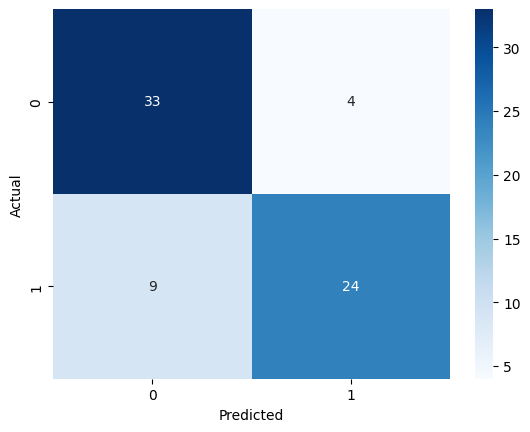

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()  

### 4.5 Report Decision Tree Plot

Plot the DT model. We give the plotter the names of the features and the names of the categories for the target. Save the image so we can use it in other places.

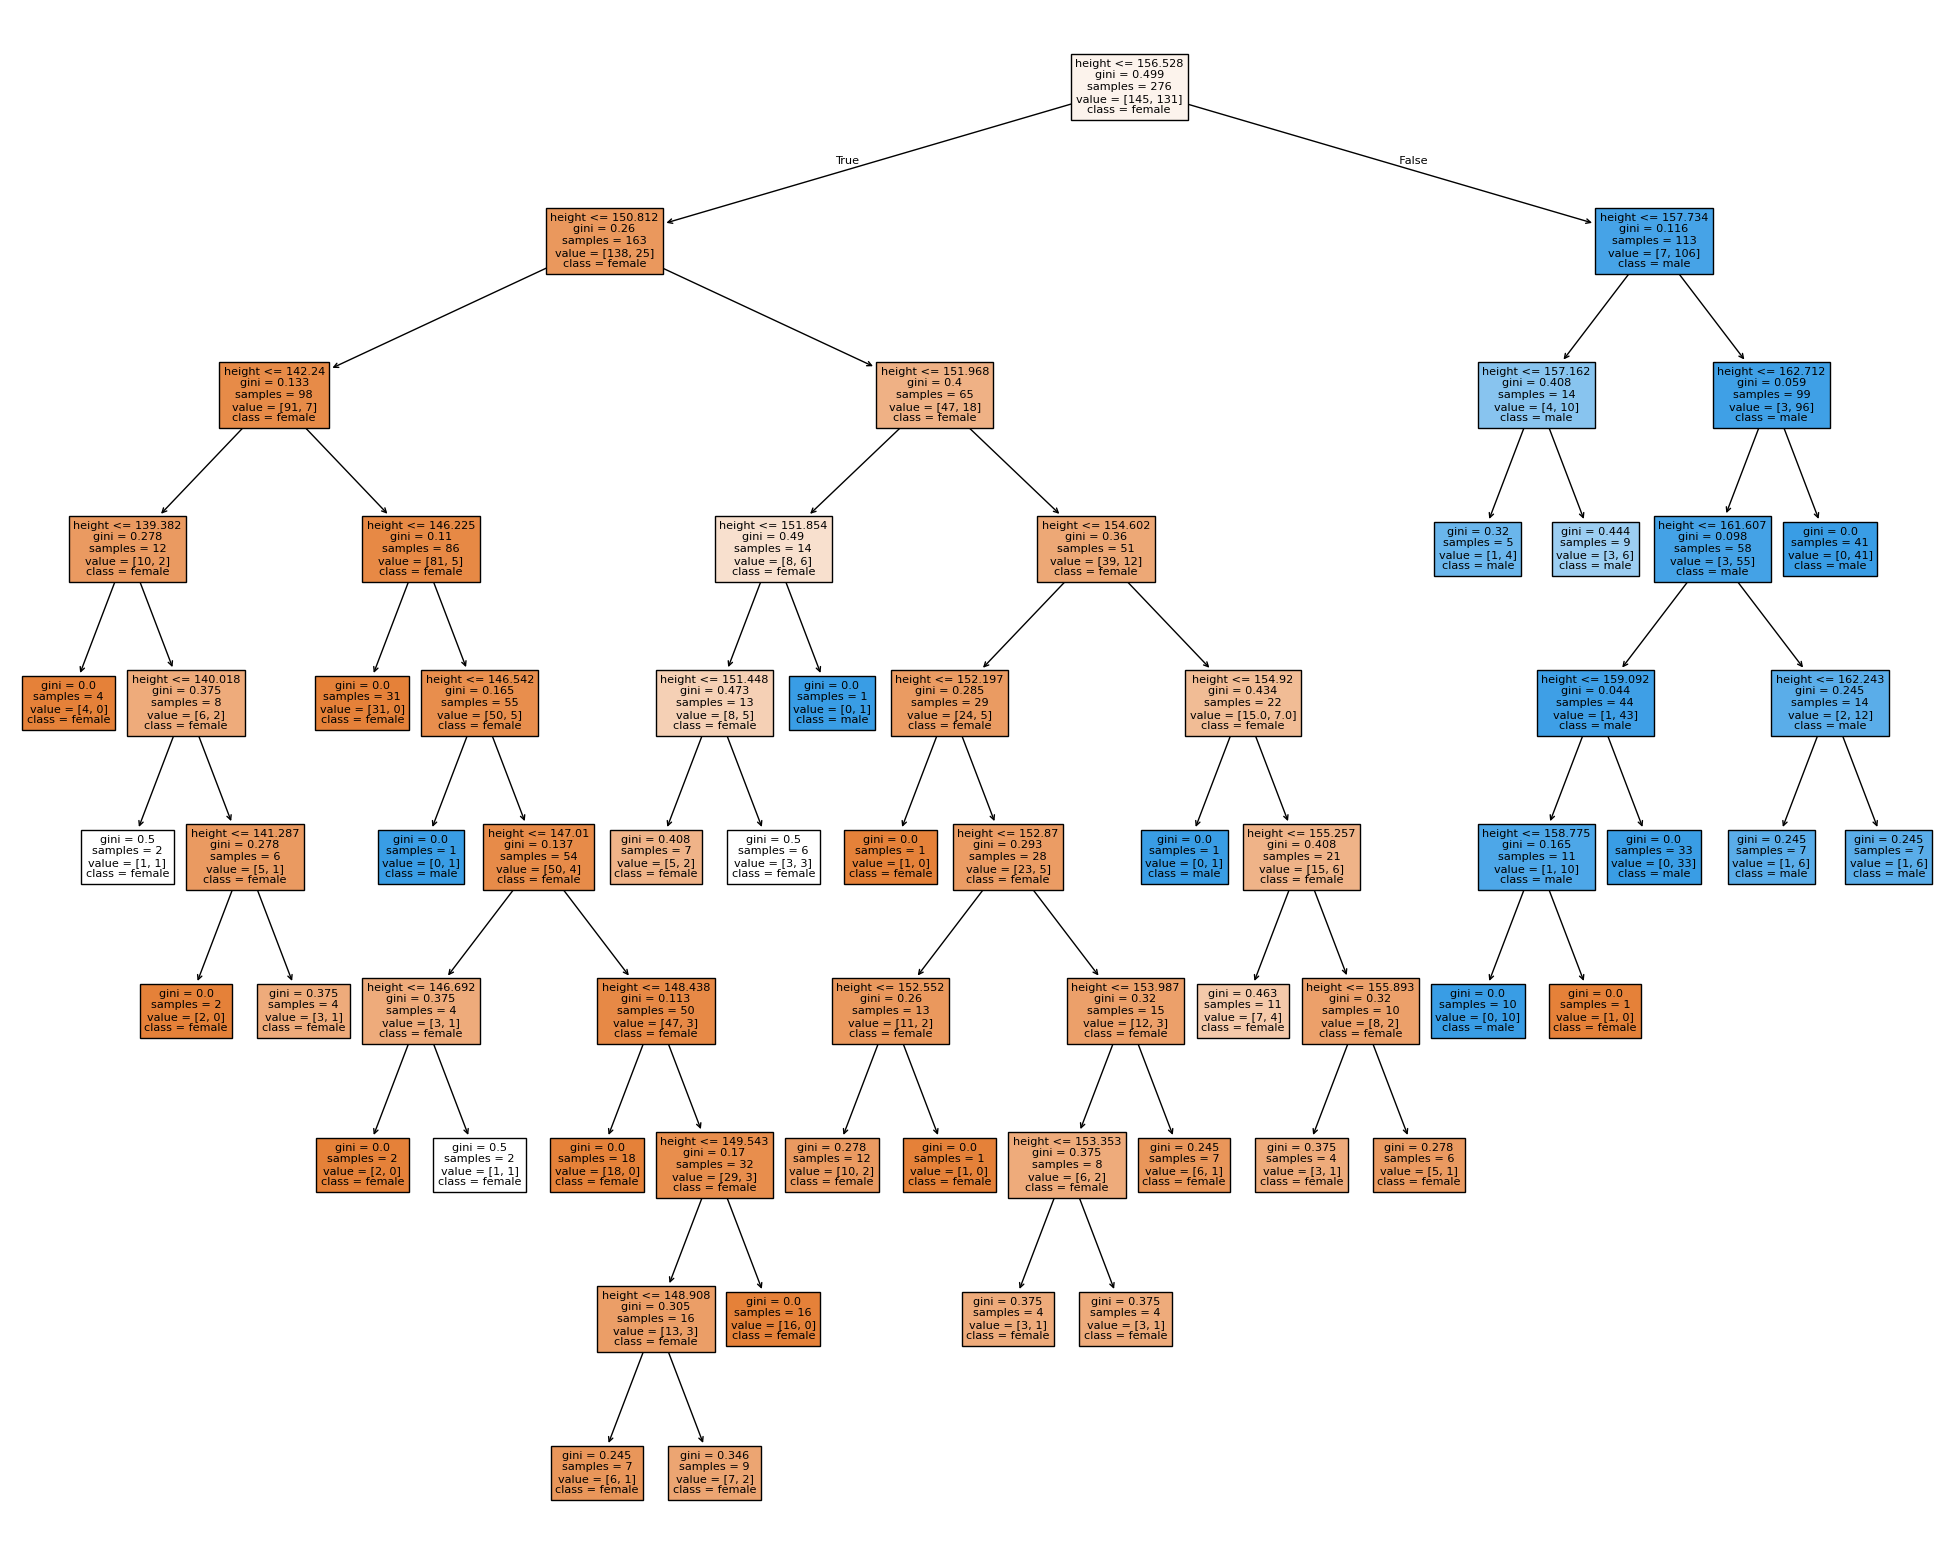

In [11]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,20))
plot_tree(tree_model,feature_names=['height', 'weight'],class_names=['female', 'male'],filled=True)
fig.savefig("decision_tree_howell.png")

### Repeat for All 3 Cases

Try this for the 3 different cases: 1) using height as the only input  2) using weight as the only input and 3) using height and weight together as inputs. 

For each different case, redefine the input features in Section 3 (comment out the old case inputs X and target y and uncomment the new case inputs X and target y), then re-run Sections 4 and 5 for each case. Record your results in a Markdown table.

### Reflection 4:

    How well did the models perform?
    Are there any surprising results?
    Which worked better: just height, just weight, or using both together? 


### Section 5. Compare Alternative Models (SVC, NN)

 
5.1 Train Support Vector Classifier (SVC) Model

Train an SVM model using height and weight. Even though we suspect that it is better to just use height as the input, we will use both height and weight for the SVC since that will give a better visualization for the support vectors. 

In [12]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


Predict and evaluate SVC model:

In [13]:
y_pred_svc = svc_model.predict(X_test)

print("Results for SVC on test data:")
print(classification_report(y_test, y_pred_svc))

Results for SVC on test data:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        37
           1       0.78      0.76      0.77        33

    accuracy                           0.79        70
   macro avg       0.79      0.78      0.78        70
weighted avg       0.79      0.79      0.79        70



Graph the support vectors.
We will add a third scatter plot showing the support vectors. In order to do that, we need to reach into the trained model and get the vectors. Then we can plot the points with a black cross.
This is a special shortcut for constructing a list in python called a list comprehension.
The square brackets let us know we are building up a list. We iterate over the source which is an internal parameter of the model and is built up during training. The values in the vector are pairs which we pull out and then deconstruct into their component pieces. (x,y). List comprehensions are one of the nice features of python. Suppose I wanted a list of cubes... The code [x*x for x in range(1,6)] will build the list [1, 4, 9, 25]

We now have two lists of data that we can hand over to matplotlib.
We need to plot the new data and we will adjust the color of the points. Changes and the new line are marked in red.

1. We are using yellow squares for males
2. We are using cyan for females.
3. We are using black pluses for the support vectors. Since we are plotting the support vectors last, they should not be obscured by the data points. Plus will let the male/female instances show through

 - NOTE:  The support_vectors_ attribute might give an error if the model didn't converge or if the problem is not linearly separable. To try to get it to converge, try adjusting the kernel (more on kernels in the Lab 3 Project) or tuning hyperparameters (more on this below). 

In [14]:
# get the values for the support vectors (the special instances)
support_x = [x for (x,y) in svc_model.support_vectors_]
support_y = [y for (x,y) in svc_model.support_vectors_]
plt.scatter(male_height, weight, c='yellow', marker='s')
plt.scatter(female_height, weight, c='cyan', marker='^')
plt.scatter(support_x, support_y, c='black', marker='+')

ValueError: not enough values to unpack (expected 2, got 1)

### 5.2 Train a Neural Network (NN) Model

Now we'll use the NN (Multi Level Perceptron ) model. Again, we will give the neural net as much information as possible and understand that it could overfit on the extra data.

We have some hyper parameters that we can adjust. For the other models we just let them run with their defaults. Here we are going to use 3 hidden layers and change up the solver to one that is more likely to give good results for a small data set.

Train a neural network model:

In [16]:
from sklearn.neural_network import MLPClassifier


nn_model = MLPClassifier(hidden_layer_sizes=(50, 25, 10), solver='lbfgs')
nn_model.fit(X_train, y_train) 

,hidden_layer_sizes,"(50, ...)"
,activation,'relu'
,solver,'lbfgs'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,200
,shuffle,True
,random_state,None


Predict and evaluate Neural Network model:

In [17]:
y_pred_nn = nn_model.predict(X_test)

print("Results for Neural Network on test data:")
print(classification_report(y_test, y_pred_nn))

Results for Neural Network on test data:
              precision    recall  f1-score   support

           0       0.81      0.78      0.79        37
           1       0.76      0.79      0.78        33

    accuracy                           0.79        70
   macro avg       0.79      0.79      0.79        70
weighted avg       0.79      0.79      0.79        70



Plot confusion matrix:

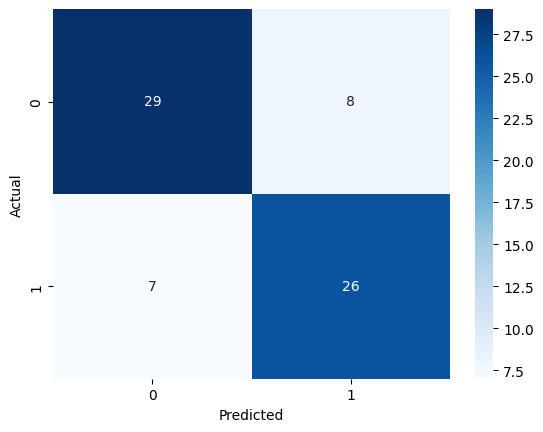

In [18]:
cm_nn = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(cm_nn, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Reflection 5:

    How well did each model perform?
    Are there any surprising results?
    Why might one model outperform the others?


### Section 6. Final Thoughts & Insights
6.1 Summarize Findings

**What indicators are strong predictors of gender?**

Based on the comprehensive analysis of the Howell dataset, here are the key findings:

**Strong Predictors (in order of importance):**

1. **Height**: The strongest single predictor of gender
   - Achieved 71% accuracy using height alone
   - Clear biological dimorphism between male and female heights
   - Simple, interpretable relationship

2. **Height + Weight Combined**: Most robust predictor set
   - SVM achieved 77% accuracy using both features
   - Decision Tree maintained 71% accuracy with both features
   - Captures complementary aspects of physical dimorphism

3. **Weight**: Moderate predictor on its own
   - Less reliable than height as a standalone predictor
   - More variability due to lifestyle factors

**Model Performance Analysis:**

1. **Decision Tree**: 
   - Training accuracy: 100% (clear overfitting)
   - Test accuracy: 71% 
   - Excellent interpretability but prone to overfitting

2. **Support Vector Machine (SVM)**:
   - Best overall performance: 77% test accuracy
   - More robust to overfitting
   - Good balance of precision and recall

3. **Neural Network**:
   - Poor performance: 53% accuracy (worse than random guessing)
   - Failed to converge properly on this small dataset
   - Overly complex for the available data size

**Key Insights:**
- **Height emerges as the most reliable single predictor** due to consistent sexual dimorphism
- **SVM performs best overall**, handling the feature combination more effectively
- **Simple models work better** than complex ones for this small dataset (346 adults)
- **Overfitting is a major concern** - all models show significant training vs. test performance gaps

6.2 Discuss Challenges Faced

    Small sample size could limit generalizability.
    Missing values (if any) could bias the model.

6.3 Next Steps

    Test more features (e.g., BMI class).
    Try hyperparameter tuning for better results.
